In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import glob
from radioReduction import *
from astropy.stats import LombScargle
from scipy import optimize
from scipy.interpolate import make_interp_spline, BSpline


In [2]:
'''
Gathering the data
'''
# Reading all the average flux densities data tbales
dir = '1314/'
folder = glob.glob('1314/*-LLRR.dat')

# reading in the data tables
dt = []
for i in range(len(folder)):
    dt.append(pd.read_table(folder[i]))

# Calculating the means and uncert
mjd,re,ure = [],[],[]

for i in range(len(dt)):
        m,f,e = meanData(dt[i])
        mjd.append(m)
        re.append(f)
        ure.append(e)
longTerm = pd.DataFrame(data={'mjd':mjd,'re':re,'ure':ure})
longTerm = longTerm.sort_values(by='mjd')

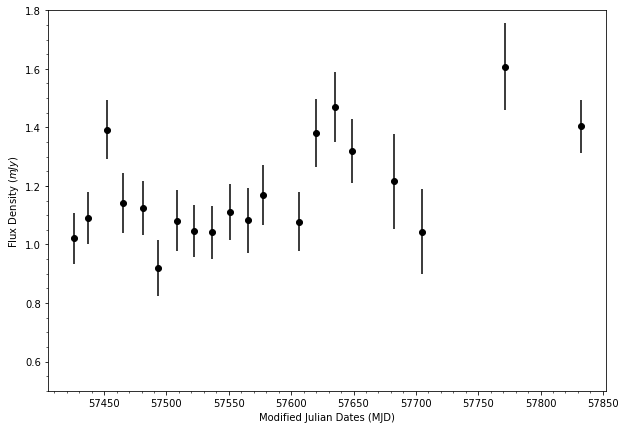

In [3]:
plt.figure(figsize=(10,7))
plt.scatter(longTerm['mjd'],longTerm['re'],marker='o',color='black')
plt.errorbar(longTerm['mjd'],longTerm['re'],yerr=longTerm['ure'],color='black',linestyle='None',label='_nolegend_')
plt.ylim(0.5,1.8)
plt.minorticks_on()
plt.ylabel('Flux Density ($mJy$)')
plt.xlabel('Modified Julian Dates (MJD)')
plt.savefig('plots/1314LongTerm.png')
plt.show()


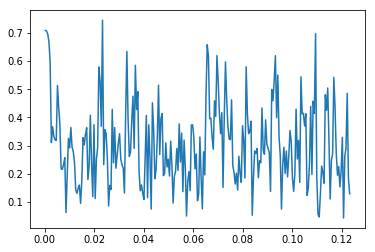

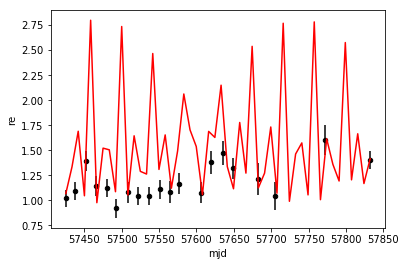

42.81982435829445


In [4]:
freq, power = LombScargle(longTerm['mjd'],longTerm['re'],longTerm['ure'],nterms=3).autopower()
plt.plot(freq,power)
plt.show()
best_freq = freq[np.argmax(power)]
x_fit = np.linspace(np.min(longTerm['mjd']),np.max(longTerm['mjd']))
y_fit = LombScargle(longTerm['mjd'],longTerm['re'],longTerm['ure'],nterms=3).model(x_fit,best_freq)

longTerm.plot.scatter('mjd','re',yerr='ure',color='black')
plt.plot(x_fit,y_fit,color='red')
plt.show()

print(1/best_freq)

## Looking at SED

In [55]:
dt = pd.read_table('2m1314_data_table.txt',sep=' ')

In [121]:
low = pd.DataFrame(data={'mjd':dt['MJD'],'re':dt['5 GHz Flux ($\\m Jy$)'],'ure':dt['5 GHz err ($\\m Jy$)']})
high = pd.DataFrame(data={'mjd':dt['MJD'],'re':dt['7 GHz Flux ($\\m Jy$)'],'ure':dt['7 GHz err ($\\m Jy$)']})
ratio = low['re']/high['re']
ratioErr = np.abs(ratio)*np.sqrt((high['ure']/high['re'])**2+(low['ure']/low['re'])**2)

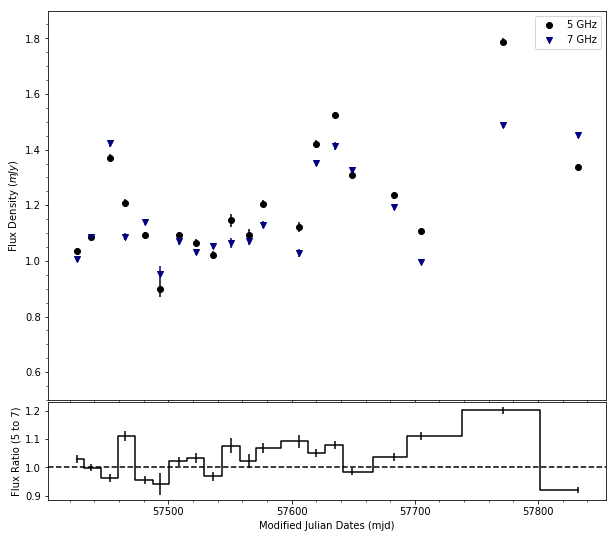

In [122]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(10,9),gridspec_kw = {'hspace':.01,'height_ratios':[4,1]},sharex=True)
ax[0].scatter(low['mjd'],low['re'],color='k',marker='o',label='5 GHz')
ax[0].errorbar(low['mjd'],low['re'],yerr=low['ure'],color='k',linestyle='None',label='_nolegend_')
ax[0].scatter(high['mjd'],high['re'],color='navy',marker='v',label='7 GHz')
ax[0].errorbar(high['mjd'],high['re'],yerr=high['ure'],color='navy',linestyle='None',label='_nolegend_')
ax[0].legend(loc='best')
ax[0].set_ylabel('Flux Density ($mJy$)')
ax[0].set_ylim(0.5,1.9)
ax[0].minorticks_on()

ax[1].plot(low['mjd'],ratio,color='black',drawstyle='steps-mid')
ax[1].axhline(y=1,color='k',linestyle='dashed')
ax[1].errorbar(low['mjd'],ratio,color='black',yerr=ratioErr,linestyle='none',label='_nolegend_')
ax[1].set_ylabel('Flux Ratio (5 to 7)')
plt.xlabel('Modified Julian Dates (mjd)')
plt.savefig('plots/SED_1314.png')
plt.show()

In [132]:
# Calculating spectral index
alpha = np.log10(ratio)/np.log10(5/7)

# Calculating Error on alpha
errLogR = ratioErr/ratio
alphaErr = np.abs(1/np.log10(5/7))*errLogR



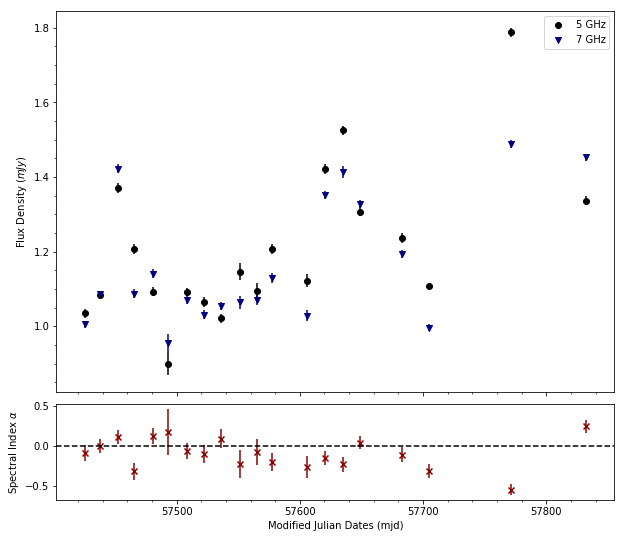

In [134]:
# PLotting SED compared to alpha values
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(10,9),gridspec_kw = {'hspace':.05,'height_ratios':[4,1]},sharex=True)
ax[0].scatter(low['mjd'],low['re'],color='k',marker='o',label='5 GHz')
ax[0].errorbar(low['mjd'],low['re'],yerr=low['ure'],color='k',linestyle='None',label='_nolegend_')
ax[0].scatter(high['mjd'],high['re'],color='navy',marker='v',label='7 GHz')
ax[0].errorbar(high['mjd'],high['re'],yerr=high['ure'],color='navy',linestyle='None',label='_nolegend_')
ax[0].legend(loc='best')
ax[0].set_ylabel('Flux Density ($mJy$)')
ax[0].minorticks_on()

ax[1].scatter(low['mjd'],alpha,color='darkred',marker='x')
ax[1].errorbar(low['mjd'],alpha,color='darkred',yerr=alphaErr,linestyle='None',label='_nolegend_')
ax[1].axhline(y=0,color='k',linestyle='dashed')
ax[1].set_ylabel('Spectral Index $\\alpha$')

plt.xlabel('Modified Julian Dates (mjd)')
plt.savefig('plots/1314_SED_Alpha.png')
plt.show()

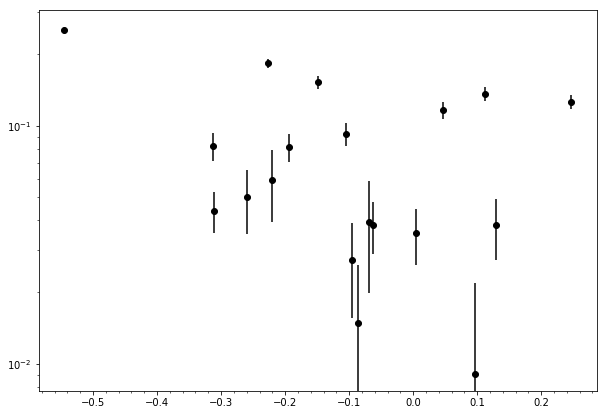

In [150]:
plt.figure(figsize=(10,7))
plt.errorbar(alpha,np.log10(low['re']),color='black',yerr=(low['ure']/low['re']),linestyle='None',label='_nolegend_')
plt.semilogy(alpha,np.log10(low['re']),color='black',marker='o',linestyle='none')
plt.minorticks_on()
plt.axis('tight')
plt.show()

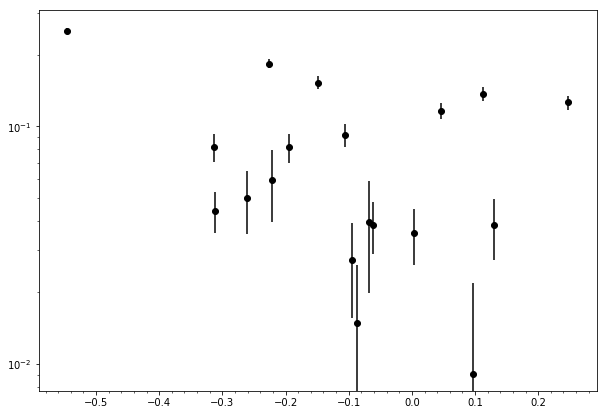

In [147]:
plt.figure(figsize=(10,7))
plt.scatter(alpha,np.log10(low['re']),color='black',marker='o')
plt.errorbar(alpha,np.log10(low['re']),color='black',yerr=low['ure']/low['re'],linestyle='None',label='_nolegend_')
plt.yscale('log')
plt.minorticks_on()
plt.axis('tight')
plt.show()

In [148]:
low['ure']/low['re']

0     0.011161
1     0.009443
2     0.009438
3     0.011099
4     0.011034
5     0.032211
6     0.009468
7     0.011724
8     0.012690
9     0.019808
10    0.019479
11    0.011106
12    0.014979
13    0.009445
14    0.008010
15    0.009018
16    0.010107
17    0.008696
18    0.006574
19    0.008488
dtype: float64

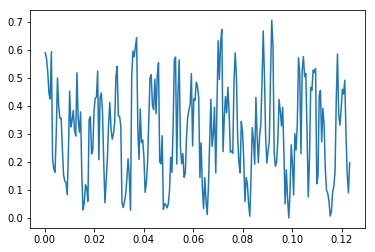

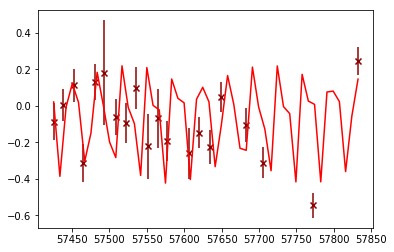

10.905853388739922


In [138]:
freq, power = LombScargle(low['mjd'],alpha,alphaErr,nterms=2).autopower()
plt.plot(freq,power)
plt.show()
best_freq = freq[np.argmax(power)]
x_fit = np.linspace(np.min(longTerm['mjd']),np.max(longTerm['mjd']))
y_fit = LombScargle(low['mjd'],alpha,alphaErr,nterms=2).model(x_fit,best_freq)

plt.scatter(low['mjd'],alpha,color='darkred',marker='x')
plt.errorbar(low['mjd'],alpha,color='darkred',yerr=alphaErr,linestyle='None',label='_nolegend_')
plt.plot(x_fit,y_fit,color='red')
plt.show()

print(1/best_freq)